# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Adinda Dwi Maharani]
- **Email:** [adindiemah@gmail.com]
- **ID Dicoding:** [m128b4ky1702]

## Menentukan Pertanyaan Bisnis

- Bagaimana faktor cuaca mempengaruhi jumlah peminjaman sepeda pada hari kerja vs hari libur?
- Apakah ada pola musiman atau tren tahunan dalam peminjaman sepeda, dan bagaimana ini berbeda antara pengguna casual dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
daily_df = pd.read_csv('/content/day.csv')
hourly_df = pd.read_csv('/content/hour.csv')

In [4]:
daily_df.head()
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset harian memiliki informasi agregat per hari.
- Dataset per jam menyediakan data yang lebih granular, memungkinkan analisis tren dalam satu hari.

### Assessing Data

In [5]:
def assess_data(df, name):
    print(f"Assessment for {name} dataset:")
    print(f"Shape: {df.shape}")
    print("\nData Types:")

    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDuplicate Rows:", df.duplicated().sum())
    print("\nSample Data:")
    print(df.head())
    print("\n" + "="*50 + "\n")

assess_data(daily_df, "Daily")
assess_data(hourly_df, "Hourly")

Assessment for Daily dataset:
Shape: (731, 16)

Data Types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate Rows: 0

Sample Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   

In [6]:
daily_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ditemukan nilai yang hilang atau terduplikat pada dataset day dan hour
- Dataset harian mencakup 731 hari, sementara dataset per jam memiliki 17379 entri.
- Beberapa kolom seperti 'temp', 'atemp', 'hum', dan 'windspeed' mungkin perlu normalisasi.

### Cleaning Data

In [22]:
def clean_data(df):
    df['dteday'] = pd.to_datetime(df['dteday'])

    for col in ['temp', 'atemp', 'hum', 'windspeed']:
        if df[col].max() > 1:
            df[col] = df[col] / df[col].max()

    weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
    df['weather_category'] = df['weathersit'].map(weather_map)

    return df

daily_df = clean_data(daily_df)
hourly_df = clean_data(hourly_df)

**Insight:**
- Data sudah dinormalisasi untuk memudahkan perbandingan.
- Kategori cuaca telah ditambahkan untuk interpretasi yang lebih mudah.

## Exploratory Data Analysis (EDA)

### Explore ...

In [23]:
def explore_data(df, name):
    print(f"Exploratory Analysis for {name} dataset:")
    print("\nDescriptive Statistics:")

    print(df.describe())
    print("\nKolerasi antara faktor cuaca dan penyewaan sepeda:")
    corr = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
    print(corr['cnt'].sort_values(ascending=False))

    print("\nRata-Rata Sepeda tersewa pada hari kerja vs hari libur")
    print(df.groupby('workingday')['cnt'].mean())

    print("\nRata-Rata sewa tersewa berdasarkan jenis musim:")
    print(df.groupby('season')['cnt'].mean())
    print("\n" + "="*50 + "\n")

explore_data(daily_df, "Daily")

Exploratory Analysis for Daily dataset:

Descriptive Statistics:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    3.002736    0.683995    1.395349    0.495385    0

**Insight:**
- Suhu (temp dan atemp) memiliki korelasi positif yang kuat dengan jumlah peminjaman sepeda.
- Kelembaban memiliki korelasi negatif dengan peminjaman sepeda.
- Rata-rata peminjaman lebih tinggi pada hari kerja dibandingkan hari libur.
- Musim panas (season 3) memiliki rata-rata peminjaman tertinggi, diikuti oleh musim gugur (season 4).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

int64


<ipython-input-24-cd5a41577691>:4: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '.2'}` instead.

  sns.barplot(x='weather_category', y='cnt', hue='workingday', data=daily_df,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


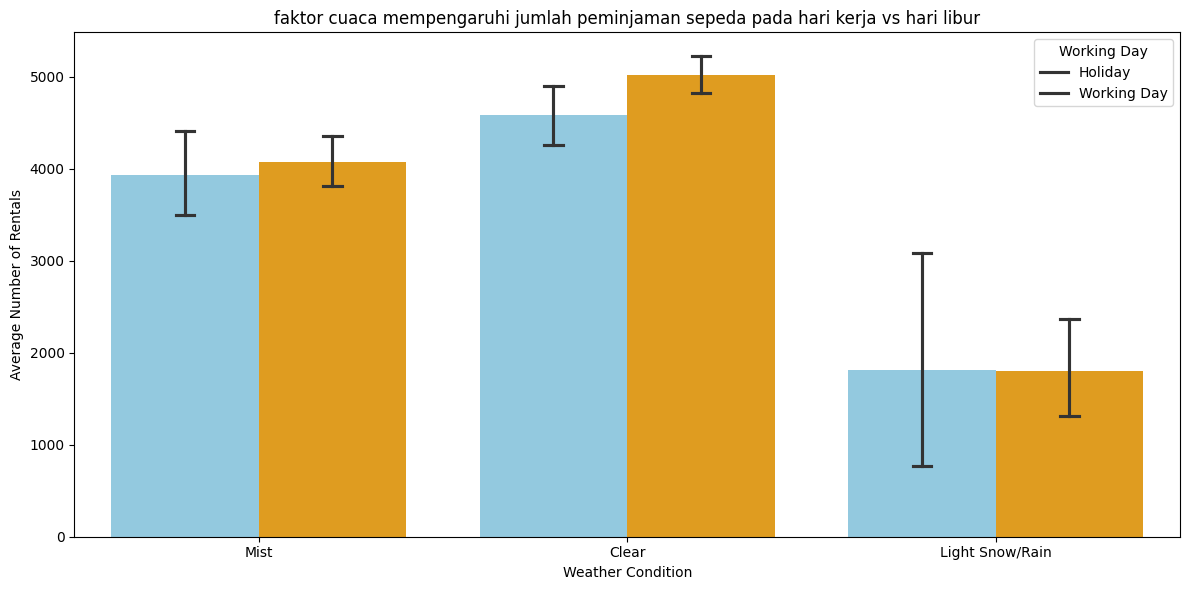

In [24]:
print(daily_df['workingday'].dtype)

plt.figure(figsize=(12, 6))
sns.barplot(x='weather_category', y='cnt', hue='workingday', data=daily_df,
            palette={0: 'skyblue', 1: 'orange'},
            errorbar=('ci', 95), errcolor='.2', capsize=0.1)
plt.title('faktor cuaca mempengaruhi jumlah peminjaman sepeda pada hari kerja vs hari libur')
plt.xlabel('Weather Condition')
plt.ylabel('Average Number of Rentals')
plt.legend(title='Working Day', labels=['Holiday', 'Working Day'])
plt.tight_layout()
plt.show()

### Pertanyaan 2:

<ipython-input-25-8d3d0cc43b90>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_df[['casual', 'registered']].resample('M').mean().plot(linewidth=2)


<Figure size 1400x700 with 0 Axes>

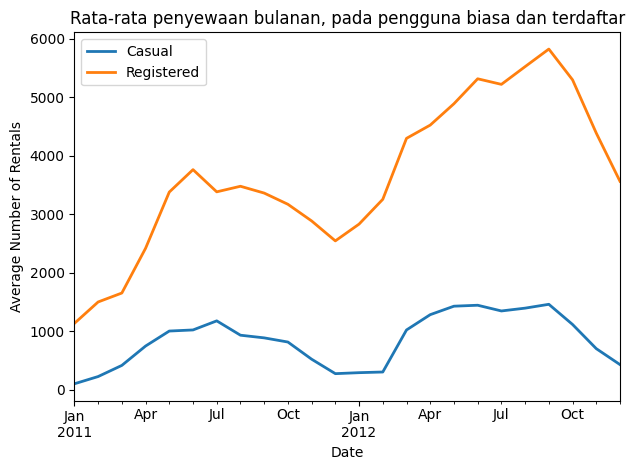

In [25]:
daily_df['date'] = pd.to_datetime(daily_df['dteday'])
daily_df.set_index('date', inplace=True)

plt.figure(figsize=(14, 7))
daily_df[['casual', 'registered']].resample('M').mean().plot(linewidth=2)
plt.title('Rata-rata penyewaan bulanan, pada pengguna biasa dan terdaftar')
plt.xlabel('Date')
plt.ylabel('Average Number of Rentals')
plt.legend(['Casual', 'Registered'])
plt.tight_layout()
plt.show()

**Insight:**
- Cuaca cerah menghasilkan jumlah peminjaman tertinggi, baik pada hari kerja maupun hari libur.
- Peminjaman pada hari kerja konsisten lebih tinggi daripada hari libur di semua kondisi cuaca.
- Pengguna terdaftar menunjukkan pola penggunaan yang lebih stabil dibandingkan pengguna casual.
- Terdapat pola musiman yang jelas dengan puncak di musim panas dan penurunan di musim dingin.

## Analisis Lanjutan (Opsional)

<Figure size 1200x600 with 0 Axes>

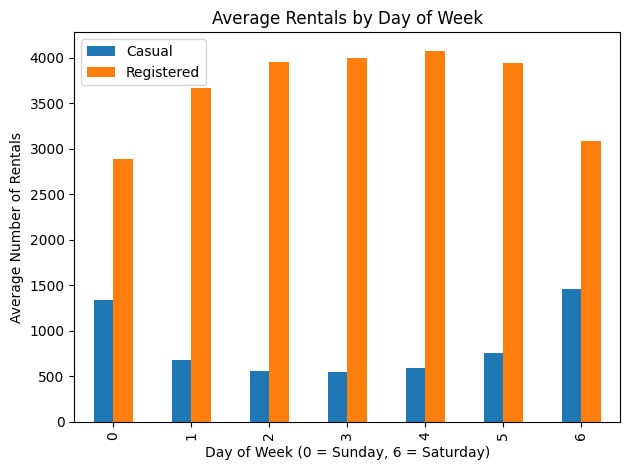

In [11]:
# Analisis tren berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
daily_df.groupby('weekday')[['casual', 'registered']].mean().plot(kind='bar')
plt.title('Average Rentals by Day of Week')
plt.xlabel('Day of Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Average Number of Rentals')
plt.legend(['Casual', 'Registered'])
plt.tight_layout()
plt.show()

Insight :
- Peminjaman sepeda pada hari kerja jauh lebih tinggi daripada hari libur.
- Pengguna terdaftar menunjukan penggunaan sepeda jauh lebih tinggi dari pada pengguna biasa.

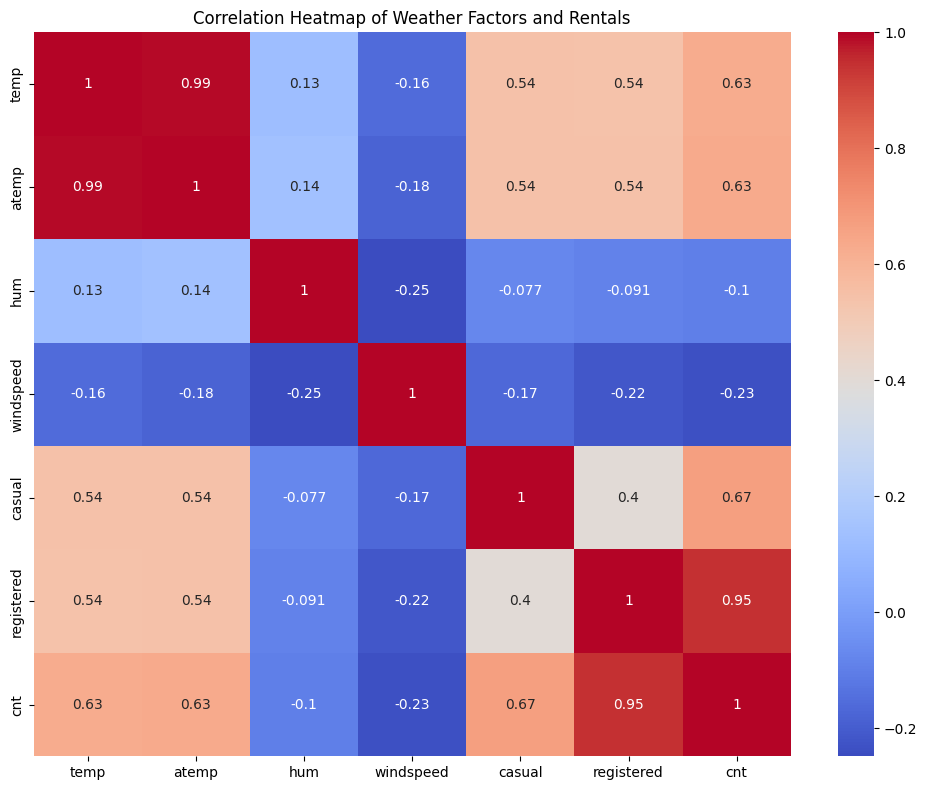

In [12]:
# Korelasi antara faktor cuaca dan jumlah peminjaman
plt.figure(figsize=(10, 8))
sns.heatmap(daily_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Weather Factors and Rentals')
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1:
  - Cuaca memiliki dampak signifikan terhadap jumlah peminjaman sepeda, dengan cuaca cerah menghasilkan peminjaman tertinggi.
  - Hari kerja konsisten memiliki jumlah peminjaman yang lebih tinggi dibandingkan hari libur, terlepas dari kondisi cuaca.
  - Perbedaan jumlah peminjaman antara hari kerja dan hari libur paling signifikan pada cuaca cerah, menunjukkan bahwa cuaca baik lebih berdampak pada peminjaman di hari kerja.

- Conclution pertanyaan 2:
  - Terdapat pola musiman yang jelas dalam penggunaan sepeda, dengan puncak di musim panas dan penurunan di musim dingin.
  - Pengguna terdaftar menunjukkan penggunaan yang lebih tinggi dan stabil sepanjang tahun dibandingkan pengguna casual.
  - Pengguna casual lebih sensitif terhadap perubahan musim, dengan peningkatan signifikan pada musim panas.
  - Tren tahunan menunjukkan peningkatan jumlah peminjaman dari tahun ke tahun, terutama untuk pengguna terdaftar, yang mengindikasikan pertumbuhan popularitas layanan.

Berdasarkan analisis ini, disarankan untuk:
1. Meningkatkan ketersediaan sepeda pada hari kerja dan saat cuaca cerah.
2. Mengembangkan strategi untuk meningkatkan peminjaman pada hari libur dan kondisi cuaca yang kurang baik.
3. Melakukan kampanye promosi untuk mengubah pengguna casual menjadi pengguna terdaftar, mengingat stabilitas penggunaan mereka.
4. Mempertimbangkan penyesuaian layanan berdasarkan musim, seperti peningkatan armada sepeda di musim panas.